<a href="https://colab.research.google.com/github/nwilliams030/AB-Demo/blob/master/Unit_2_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Process 


In [0]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [122]:
# Import data
!wget "https://storage.googleapis.com/ad-manager-political-ads-dump/political/2019/PoliticalAds.zip"
!unzip "PoliticalAds.zip"


--2019-11-22 19:37:51--  https://storage.googleapis.com/ad-manager-political-ads-dump/political/2019/PoliticalAds.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 788621 (770K) [application/octet-stream]
Saving to: ‘PoliticalAds.zip.12’

PoliticalAds.zip.12 100%[===================>] 770.14K  --.-KB/s    in 0.005s  

2019-11-22 19:37:51 (156 MB/s) - ‘PoliticalAds.zip.12’ saved [788621/788621]

Archive:  PoliticalAds.zip
replace PoliticalAds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
df = pd.read_csv("PoliticalAds.csv")

In [157]:
df.head(200)

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,Regions (Included),Regions (Excluded),Electoral Districts (Included),Electoral Districts (Excluded),Radius Targeting (Included),Radius Targeting (Excluded),Metros (Included),Metros (Excluded),Postal Codes (Included),Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,0bb4ebd96c111d8d975f5802d838c46f354349afffc320...,https://www.snap.com/political-ads/asset/97677...,EUR,196,189069,2019/08/12 08:30:41Z,2019/08/25 21:32:12Z,Reprise Media,"Skt. Petri Passage 52 ,København K,1165,DK",NaN,Sundhedsstyrelsen,FEMALE,14-19,denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
1,3573cc4c85c23472064d508bdc3b8d094a26b8c46013a9...,https://www.snap.com/political-ads/asset/a22d1...,USD,41,8507,2019/03/27 15:47:40Z,NaN,Realtime Media,"P.O. Box 13410,Arlington,22219,US",NaN,Donald J. Trump For President,NaN,18-24,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://secure.donaldjtrump.com/e...
2,6c5702d6c9647c10a6535e76d288a3cb8771254902748e...,https://www.snap.com/political-ads/asset/0828a...,USD,63,29234,2019/07/01 06:10:03Z,NaN,MP Mariam,US,NaN,Proud Right Winger,NaN,NaN,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Network Viewers (FOX News Channel),NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://proudrightwinger.com/prod...
3,45cf45030a819d7833d8b3606c79ecda7d13cf074958d5...,https://www.snap.com/political-ads/asset/47101...,USD,41,19418,2019/05/07 11:38:47Z,2019/05/11 20:28:39Z,SørenValgreen,DK,NaN,Søren Valgreen Knudsen,NaN,21-25,denmark,Nordjylland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,da,NaN,NaN,NaN,web_view_url:https://www.xn--stemsren-94a.dk/
4,41e50fc88974dcdd6f01a8bdac7f3a5873c96af4a9f68d...,https://www.snap.com/political-ads/asset/f8411...,USD,2169,677010,2019/07/01 16:00:00Z,2020/01/01 04:59:59Z,Assembly,"711 3rd Ave, New York, NY 10017,new york city...",NaN,truth,NaN,18-24,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://www.thetruth.com/articles...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,18d6e88d30338059cfe1c0e69f508bc301a7dc1f0249bd...,https://www.snap.com/political-ads/asset/46ac8...,EUR,610,126126,2019/06/26 09:00:00Z,2019/08/13 22:00:00Z,Red Performance AS,"Postboks 6733 St. Olavs Plass,Oslo,0130 ,NO",NaN,SOS-barnebyer,NaN,25+,norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.sos-barnebyer.no/oppr...
196,30d2fc461b0eeca80edf26d626f824244090adfb5c5fbd...,https://www.snap.com/political-ads/asset/3a698...,EUR,4011,2121387,2019/07/19 06:00:00Z,2019/09/30 11:22:10Z,Reprise Media,"Skt. Petri Passage 52 ,København K,1165,DK",NaN,Mejeriforeningen,NaN,25+,denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parents & Family-Focused,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
197,be7b9880b008eed4e90d3bad9dc61cf3dacb5b80494341...,https://www.snap.com/political-ads/asset/50254...,USD,14898,1895105,2019/09/20 10:00:00Z,2019/09/21 06:59:59Z,Recreational Equipment Inc.,"6750 S 228TH ST,Kent,98032-4803,US",NaN,"Recreational Equipment, Inc.",NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,NaN,NaN,NaN,NaN
198,021435c5b8ae087fafcb99a3fd73ae3407c4745e6cef2b...,https://www.snap.com/political-ads/asset/0620a...,USD,70,17718,2019/10/17 20:12:15Z,2019/11/05 23:00:00Z,ACRONYM,US,Get out the vote,ACRONYM,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [158]:
df.shape

(2865, 34)

In [159]:
df.describe()

,Spend,Impressions,Electoral Districts (Excluded),Radius Targeting (Excluded),Location Categories (Excluded),Targeting Connection Type,Targeting Carrier (ISP)
count,2865.000000,2.865000e+03,0.0,0.0,0.0,0.0,0.0
mean,1723.451309,7.473952e+05,NaN,NaN,NaN,NaN,NaN
std,12154.834056,5.019127e+06,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,37.000000,1.235900e+04,NaN,NaN,NaN,NaN,NaN
50%,150.000000,5.955900e+04,NaN,NaN,NaN,NaN,NaN
75%,681.000000,3.014860e+05,NaN,NaN,NaN,NaN,NaN
max,388496.000000,1.941820e+08,NaN,NaN,NaN,NaN,NaN


#### Clean Nulls

In [160]:
# Check for nulls
df.isna().sum()

ADID                                 0
CreativeUrl                          0
Currency Code                        0
Spend                                0
Impressions                          0
StartDate                            0
EndDate                            669
OrganizationName                     0
BillingAddress                       0
CandidateBallotInformation        2573
PayingAdvertiserName                 0
Gender                            2612
AgeBracket                         238
CountryCode                          0
Regions (Included)                2020
Regions (Excluded)                2829
Electoral Districts (Included)    2823
Electoral Districts (Excluded)    2865
Radius Targeting (Included)       2677
Radius Targeting (Excluded)       2865
Metros (Included)                 2712
Metros (Excluded)                 2850
Postal Codes (Included)           2564
Postal Codes (Excluded)           2753
Location Categories (Included)    2855
Location Categories (Excl

In [161]:
df.head(15)

,ADID,CreativeUrl,Currency Code,Spend,Impressions,StartDate,EndDate,OrganizationName,BillingAddress,CandidateBallotInformation,PayingAdvertiserName,Gender,AgeBracket,CountryCode,Regions (Included),Regions (Excluded),Electoral Districts (Included),Electoral Districts (Excluded),Radius Targeting (Included),Radius Targeting (Excluded),Metros (Included),Metros (Excluded),Postal Codes (Included),Postal Codes (Excluded),Location Categories (Included),Location Categories (Excluded),Interests,OsType,Segments,Language,AdvancedDemographics,Targeting Connection Type,Targeting Carrier (ISP),CreativeProperties
0,0bb4ebd96c111d8d975f5802d838c46f354349afffc320...,https://www.snap.com/political-ads/asset/97677...,EUR,196,189069,2019/08/12 08:30:41Z,2019/08/25 21:32:12Z,Reprise Media,"Skt. Petri Passage 52 ,København K,1165,DK",NaN,Sundhedsstyrelsen,FEMALE,14-19,denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,NaN
1,3573cc4c85c23472064d508bdc3b8d094a26b8c46013a9...,https://www.snap.com/political-ads/asset/a22d1...,USD,41,8507,2019/03/27 15:47:40Z,NaN,Realtime Media,"P.O. Box 13410,Arlington,22219,US",NaN,Donald J. Trump For President,NaN,18-24,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://secure.donaldjtrump.com/e...
2,6c5702d6c9647c10a6535e76d288a3cb8771254902748e...,https://www.snap.com/political-ads/asset/0828a...,USD,63,29234,2019/07/01 06:10:03Z,NaN,MP Mariam,US,NaN,Proud Right Winger,NaN,NaN,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TV Network Viewers (FOX News Channel),NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://proudrightwinger.com/prod...
3,45cf45030a819d7833d8b3606c79ecda7d13cf074958d5...,https://www.snap.com/political-ads/asset/47101...,USD,41,19418,2019/05/07 11:38:47Z,2019/05/11 20:28:39Z,SørenValgreen,DK,NaN,Søren Valgreen Knudsen,NaN,21-25,denmark,Nordjylland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,da,NaN,NaN,NaN,web_view_url:https://www.xn--stemsren-94a.dk/
4,41e50fc88974dcdd6f01a8bdac7f3a5873c96af4a9f68d...,https://www.snap.com/political-ads/asset/f8411...,USD,2169,677010,2019/07/01 16:00:00Z,2020/01/01 04:59:59Z,Assembly,"711 3rd Ave, New York, NY 10017,new york city...",NaN,truth,NaN,18-24,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://www.thetruth.com/articles...
5,e51b2679d98712c005c9a14a21a5f16fa2dbb205ab435a...,https://www.snap.com/political-ads/asset/64bab...,USD,14,2312,2019/09/04 22:42:40Z,NaN,Chong and Koster,"1640 Rhode Island Ave. NW, Suite 600,Washingto...",NaN,Voter Participation Center,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40070,41712,41250,42361,42083,40152,41810,4157...","42334,41052,40363,40110,41135,40473,41426,4074...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://register.vote.org/?partne...
6,305541d2c5b9412440097723e0ca0b399c1a93a6a64b63...,https://www.snap.com/political-ads/asset/45172...,EUR,6,1754,2019/08/27 08:21:37Z,2019/09/06 14:00:00Z,Geelmuyden Kiese AS,"Sommerrogata 13-15,Oslo,0255,NO",NaN,Nye Drammen kommune,NaN,18-33,norway,NaN,NaN,NaN,NaN,latitude 59.744737;longitude 10.206241;radius 0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provided by Advertiser,NaN,NaN,NaN,NaN,web_view_url:https://www.nyedrammen.no/valg-20...
7,da368e6991ce85e945b24442f0e4160b6cbcdb811b4f78...,https://www.snap.com/political-ads/asset/783ba...,USD,598,262683,2019/03/20 13:17:19Z,2019/04/16 15:49:19Z,Blueprint Interactive,"1730 Rhode Island Ave NW Suite 1014,Washington...",NaN,ACT NOW ON CLIMATE,NaN,18+,united states,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,web_view_url:https://www.jayinslee.com/join?so...
8,3840f878c7f8ec84e40274d03ea973319282c6eed68542...,https://www.snap.com/political-ads/asset/62844...,USD,0,146,2019/03/03 18:53:01Z,NaN,Greetings,"aladan b2 st50 h4,aladan,23005,KW",NaN,Abdullah Ahmad Alkanda

In [162]:
# Drop categories with high nulls
df2 = df.drop(columns=["CandidateBallotInformation", "Gender", 
                       "Interests", "OsType", "Language",
                       "AdvancedDemographics", "Targeting Connection Type", 
                       "Targeting Carrier (ISP)", "Regions (Included)", "Regions (Excluded)",
                       "Electoral Districts (Included)", "CreativeProperties", 
                       "Electoral Districts (Excluded)", 
                       "Radius Targeting (Included)", "Radius Targeting (Excluded)", 
                       "Metros (Included)", "Metros (Excluded)", "Postal Codes (Included)",
                       "Postal Codes (Excluded)", "Location Categories (Included)", 
                       "Location Categories (Excluded)", "Segments"
                       ])
df2.isna().sum()

ADID                      0
CreativeUrl               0
Currency Code             0
Spend                     0
Impressions               0
StartDate                 0
EndDate                 669
OrganizationName          0
BillingAddress            0
PayingAdvertiserName      0
AgeBracket              238
CountryCode               0
dtype: int64

In [163]:
df2.shape

(2865, 12)

In [0]:
# Remove the most extreme impressions and spend
#df2 = df[(df['Impressions'] >= np.percentile(df['Impressions'], 0.5)) & 
 #     (df['Impressions'] <= np.percentile(df['Impressions'], 99.5)) & 
  #    (df['Spend'] >= np.percentile(df['Spend'], 0.05)) & 
   #   (df['Spend'] <= np.percentile(df['Spend'], 99.95))]

#### Fix Heavy Rightward Skew

In [0]:
condition = df2['Spend'] <= 25000
df2 = df2[condition]

## Linear Regression 

Include: Target, evaluation metric, and baseline, for a regression, binary classification, or multi-class classification problem, with labeled, tabular dataset)

### Define Baseline

In [194]:
#  Can we guess what the impressions (target, y) are, given a random spend (feature,x)? 

# Baseline 
df2['Impressions'].describe() 

# Our baseline, if we just constantly guessed the mean, is 7.517653e+05 impressions.

count    2.272000e+03
mean     4.336904e+05
std      1.518380e+06
min      1.000000e+00
25%      1.158425e+04
50%      5.555050e+04
75%      2.731672e+05
max      3.031140e+07
Name: Impressions, dtype: float64

In [195]:
# Let's see how far we were off, on average 
guess = df2['Impressions'].mean()
errors = guess - df2['Impressions']
mean_absolute_error = errors.abs().mean()
print(f'If we just guessed every snapchat story got {guess:,.0f} impressions,')
print(f'we would be off by {mean_absolute_error:,.0f} on average.')

If we just guessed every snapchat story got 433,690 impressions,
we would be off by 575,738 on average.


In [196]:
# Plotting the relationship between impressions and spend, with line of best fit 
import plotly.express as px
px.scatter(df2, x='Spend', y='Impressions', trendline='ols')

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [0]:
# Student also explains: Why & how they chose their target, metric, and baseline. 
# How they avoided leakage. When & why the model is (or is not) useful

#### Fix heavy rightward skew


### Fit & Train Model

In [0]:
from sklearn.model_selection import train_test_split 

df2, test = train_test_split(df2, train_size=.8, random_state=42)

In [199]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df2, train_size = .8, random_state=42)
#train, val = train_test_split(train, train_size = .8, random_state=42)

train.shape, val.shape

((1453, 12), (364, 12))

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target = 'Impressions'
features = ['Spend']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [201]:
# validation score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_val, y_val)

0.5392018874384344

In [202]:
# test score
X_test = test[features]
y_test = test[target]
#print(cross_val_score(model2, X_train_scaled, y_train, cv=3))

model.score(X_test, y_test)

0.5088259273921495

In [0]:
## Note: But, there's a quirk: For scikit-learn's cross-validation scoring, higher is better. 
#But for regression error metrics, lower is better. So scikit-learn multiplies regression error metrics by -1 
#to make them negative. That's why the value of the scoring parameter is 'neg_mean_absolute_error'.

## Fit & evaluate a decision tree, random forest, or gradient boosting model for regression or classification

In [0]:
!pip install -q category_encoders

#### Train Test Random Split

In [206]:
train, test = train_test_split(df2, random_state=42)
train, val = train_test_split(train, random_state=42)

train.shape, test.shape, val.shape, df2.shape


((1021, 12), (455, 12), (341, 12), (1817, 12))

In [0]:
#How well can impressions be predicted just from spend, just using a linear model? (Measured by MAE and R^2)
#o that could be the simplest baseline to compare to
#Then your tree-based model could be a pipeline:
#category_encoders OrdinalEncoder
#SimpleImputer
#RandomForestRegressor
#You would use more features than just Spend, and you would not need to filter out the high cardinality categoricals

#### Define Features and Target

In [0]:
df2['Currency Code'] = df2['Currency Code'].astype(str)
df2['CountryCode'] = df2['CountryCode'].astype(str)

In [209]:
# The status_group column is the target
target = 'Impressions'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)

['Spend', 'Currency Code', 'CountryCode']


In [210]:
train.nunique()

ADID                    1021
CreativeUrl              799
Currency Code              5
Spend                    558
Impressions             1018
StartDate                470
EndDate                  349
OrganizationName         184
BillingAddress           134
PayingAdvertiserName     215
AgeBracket                73
CountryCode               24
dtype: int64

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# These are the only two changes from the previous code cell:
# Remove StandardScaler (it's not needed or helpful for trees)
# Change the model from LogisticRegression to DecisionTreeClassifier

#One hot encorder - 5 columns for country code for example, binaries for each 
# unique value 

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='mean'), 
    RandomForestRegressor(max_depth=2, min_samples_leaf=2, random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score on train, val
print('R Squared Score', pipeline.score(X_train, y_train))
print('R Squared Score', pipeline.score(X_val, y_val))

# Predict on test
y_pred = pipeline.predict(X_test)
## train and validation accuracy

R Squared Score 0.6415721689193137
R Squared Score 0.2601138610245295


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [216]:
# the way I trained the model doesn't generalize - could be that the features aren't predictive
# could be that we over fitted

# test score
pipeline.score(X_test, y_test)

0.4565747563286755

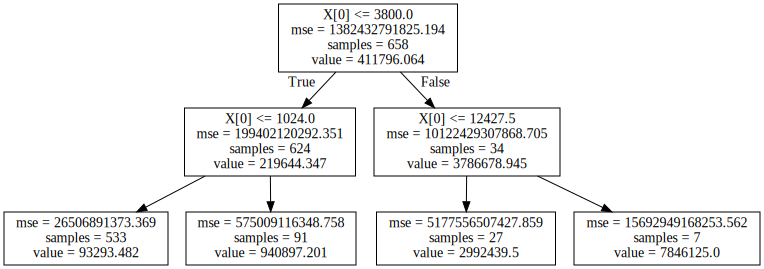

In [217]:
graphviz.Source(export_graphviz(pipeline['randomforestregressor'].estimators_[-1]))




## Report Scores

## Visualizations (2+)